# Modeling Non-Linear Patterns with Activation Functions


### Imports

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

import utils

### Preparing non-linear data

Load the same dataset that caused problems at the end in linear-model. This is the combined data for both bike and car deliveries.

In [8]:
# Combined dataset: bikes for short distances, cars for longer ones
distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

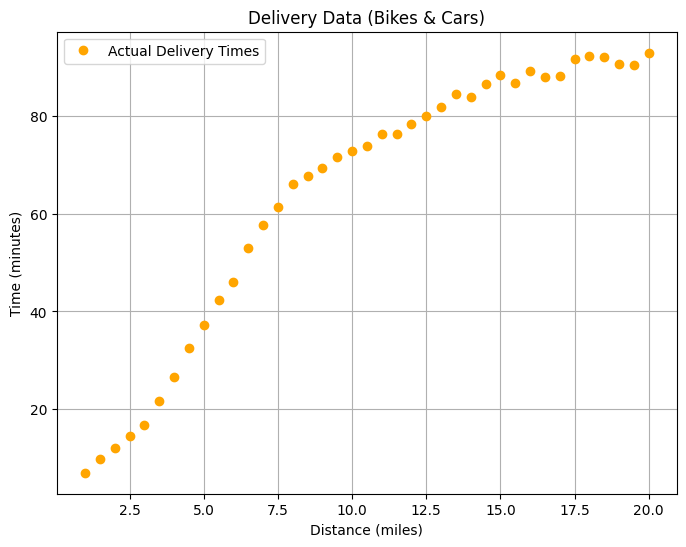

In [9]:
utils.plot_data(distances, times)

### Normalize the data

Apply a quick data preparation step called normalization. This is a standard technique that makes the training process more stable and effective by adjusting the scale of the data. This adjustment helps prevent large distance values from dominating the learning process and keeps gradients stable during training.


- Calculate the mean and standard deviation for the distances and times tensors.
- Apply standardization to each tensor using its respective mean and standard deviation, which creates new normalized tensors named distances_norm and times_norm.
- This specific technique is called standardization (or z-score normalization), which converts the original data from 1.0 to 20.0 miles and approximately 7 to 93 minutes into a new, normalized scale.

In [10]:
# Calculate the mean and standard deviation for the 'distances' tensor
distances_mean = distances.mean()
distances_std = distances.std()

# Calculate the mean and standard deviation for the 'times' tensor
times_mean = times.mean()
times_std = times.std()

# Apply standardization to the distances.
distances_norm = (distances - distances_mean) / distances_std

# Apply standardization to the times.
times_norm = (times - times_mean) / times_std

- Nnotice the axes now show the data on a new, normalized scale, with distance ranging from approximately -1.7 to 1.7 and time from -2.0 to 1.0.
- Despite this change in scale, the underlying curved pattern of the data remains exactly the same.

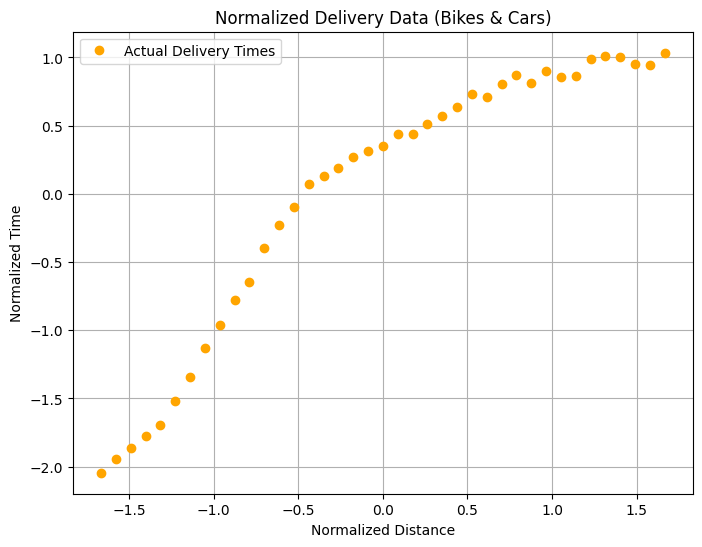

In [11]:
utils.plot_data(distances_norm, times_norm, normalize=True)

### Building non-linear model

Create neural network with 1 hidden layer consisting of 3 inputs

In [12]:
# This line ensures that your results are reproducible and consistent every time.
torch.manual_seed(42)

model = nn.Sequential(
  nn.Linear(1, 3),
  nn.ReLU(),
  nn.Linear(3, 1)
)

### Training

Define loss function and optimizer

In [13]:
# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

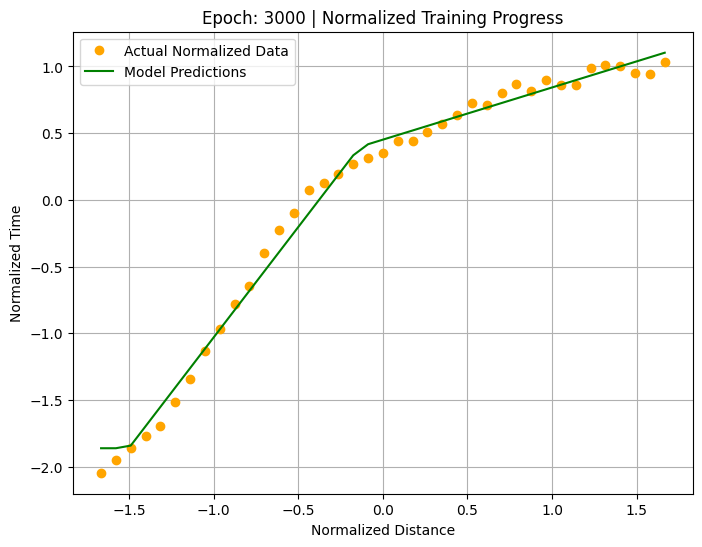


Training Complete.

Final Loss: 0.007583157159388065


In [15]:
# Training loop
for epoch in range(3000):
    # Reset the optimizer's gradients
    optimizer.zero_grad()
    # Make predictions (forward pass)
    outputs = model(distances_norm)
    # Calculate the loss
    loss = loss_function(outputs, times_norm)
    # Calculate adjustments (backward pass)
    loss.backward()
    # Update the model's parameters
    optimizer.step()

    # Create a live plot every 50 epochs
    if (epoch + 1) % 50 == 0:
        utils.plot_training_progress(
            epoch=epoch,
            loss=loss,
            model=model,
            distances_norm=distances_norm,
            times_norm=times_norm
        )

print("\nTraining Complete.")
print(f"\nFinal Loss: {loss.item()}")

### Check final fit

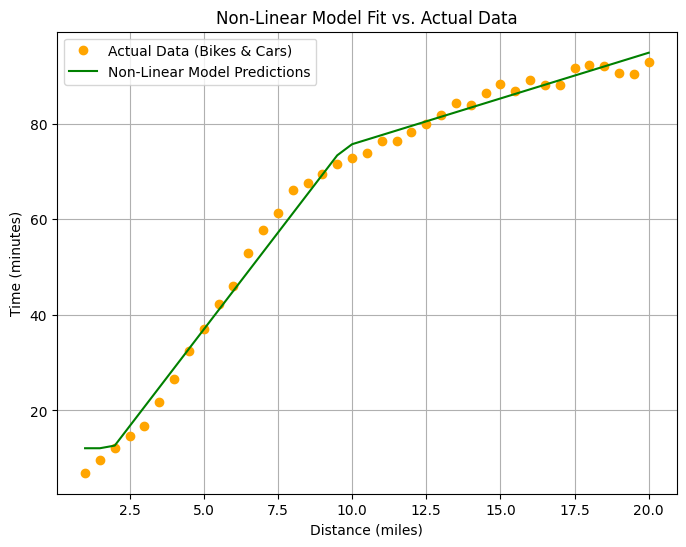

In [16]:
utils.plot_final_fit(model, distances, times, distances_norm, times_std, times_mean)

Making a prediction

In [17]:
distance_to_predict = 5.1

In [18]:
# Use the torch.no_grad() context manager for efficient prediction
with torch.no_grad():
    # Normalize the input distance
    distance_tensor = torch.tensor([[distance_to_predict]], dtype=torch.float32)
    new_distance_norm = (distance_tensor - distances_mean) / distances_std
    
    # Get the normalized prediction from the model
    predicted_time_norm = model(new_distance_norm)
    
    # De-normalize the output to get the actual time in minutes
    predicted_time_actual = (predicted_time_norm * times_std) + times_mean
    
    # --- Decision Making Logic ---
    print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time_actual.item():.1f} minutes")
    
    # First, check if the delivery is possible within the 45-minute timeframe
    if predicted_time_actual.item() > 45:
        print("\nDecision: Do NOT promise the delivery in under 45 minutes.")
    else:
        # If it is possible, then determine the vehicle based on the distance
        if distance_to_predict <= 3:
            print(f"\nDecision: Yes, delivery is possible. Since the distance is {distance_to_predict} miles (<= 3 miles), use a bike.")
        else:
            print(f"\nDecision: Yes, delivery is possible. Since the distance is {distance_to_predict} miles (> 3 miles), use a car.")

Prediction for a 5.1-mile delivery: 37.8 minutes

Decision: Yes, delivery is possible. Since the distance is 5.1 miles (> 3 miles), use a car.


### Conclusion

- How adding a non-linear activation function like ReLU gave your model the ability to succeed where the linear model had failed.
- Moved beyond fitting straight lines and can now capture the complex, curved patterns that are common in real-world data, and also learned a practical data preparation technique, normalization, that helps make the training process more stable and effective.